In [2]:
import numpy as np
alto = 50
ancho = 200
mi_arreglo = np.zeros((alto,ancho))

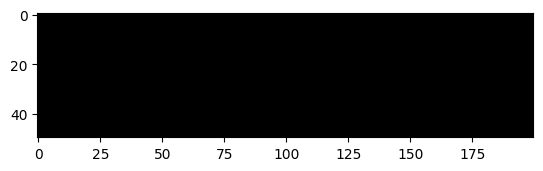

In [4]:
import matplotlib.pyplot as plt
plt.imshow(-mi_arreglo, cmap = 'gray')

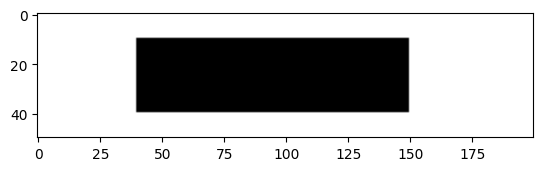

In [5]:
mi_arreglo[10:40, 40:150] = 1
plt.imshow(-mi_arreglo, cmap = 'gray')

IMAGEN
Abajo de donde dice archivos, ahi le doy subir y cargo la imagen, ya con eso me deja cargarla

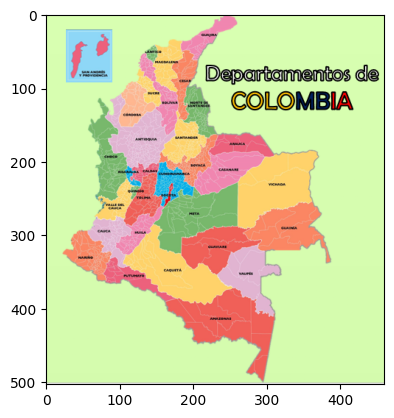

In [7]:
arch='imagen.png'
img_tmp=plt.imread(arch)
plt.imshow(img_tmp)

In [11]:
type(img_tmp)
img_tmp.shape

(503, 460, 3)

In [12]:
img_tmp[175,250]

array([0.36862746, 0.1764706 , 0.21960784], dtype=float32)

In [13]:
img_tmp.max(), img_tmp.min()

(1.0, 0.0)

(503, 460)


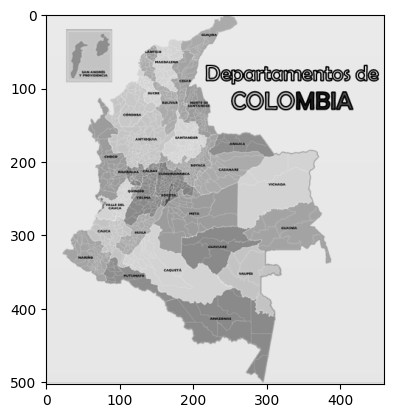

In [38]:
import cv2
import numpy as np
arch='imagen.png'
img_tmp=cv2.imread(arch,0)
print(img_tmp.shape)
plt.imshow(img_tmp, cmap='gray')

In [27]:
# Calculate the correct dimensions for reshaping based on the original shape
img_reshaped = img_tmp.reshape(1, img_tmp.shape[0], img_tmp.shape[1], 1)
# This ensures the total number of elements remains the same

# Print the shape of the reshaped array
img_reshaped.shape

(1, 503, 460, 1)

CAMBIAR TAMANIO DE MI IMAGEN

(403, 360)


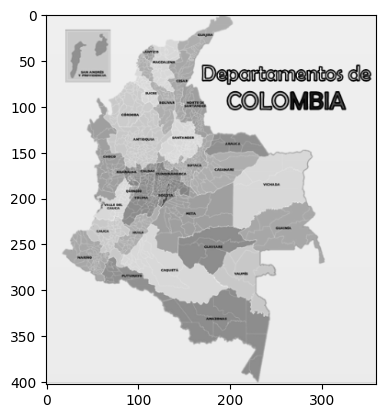

(1, 403, 360, 1)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image using cv2
arch = 'imagen.png'
img_tmp = cv2.imread(arch, 0)

# Define the new dimensions you want
new_height = 403
new_width = 360

# Resize the image using cv2.resize
resized_img = cv2.resize(img_tmp, (new_width, new_height))

# Print the shape of the resized image
print(resized_img.shape)

# Display the resized image
plt.imshow(resized_img, cmap='gray')
plt.show()

# Reshape the resized image for your model (if needed)
img_reshaped = resized_img.reshape(1, resized_img.shape[0], resized_img.shape[1], 1)
img_reshaped.shape

USAR FILTROS


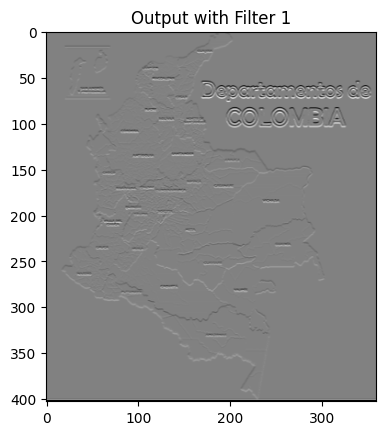

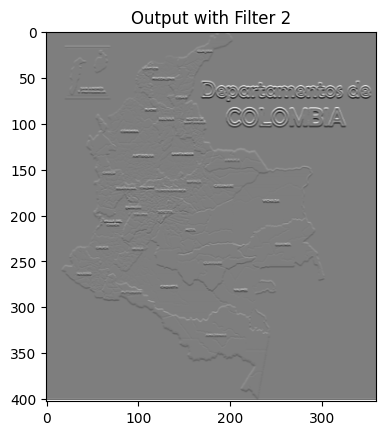

In [35]:
import tensorflow as tf

# Define your filters
filter1 = np.array([[-1, -1], [1, 1]])
filter2 = np.array([[1, 1], [-1, -1]])

# Reshape the filters to match the input shape (height, width, channels, filters)
filter1 = filter1.reshape(2, 2, 1, 1)
filter2 = filter2.reshape(2, 2, 1, 1)

# Convert filters to TensorFlow tensors
filter1_tf = tf.constant(filter1, dtype=tf.float32)
filter2_tf = tf.constant(filter2, dtype=tf.float32)


# Assuming you have 'img_reshaped' containing your image data
# Apply convolution with the first filter
output1 = tf.nn.conv2d(img_reshaped, filter1_tf, strides=[1, 1, 1, 1], padding='SAME')

# Apply convolution with the second filter
output2 = tf.nn.conv2d(img_reshaped, filter2_tf, strides=[1, 1, 1, 1], padding='SAME')

# You can now process 'output1' and 'output2' further, such as applying activation functions, pooling, etc.

# Example of displaying the output of the first filter
plt.imshow(output1[0, :, :, 0].numpy(), cmap='gray')
plt.title('Output with Filter 1')
plt.show()

# Example of displaying the output of the second filter
plt.imshow(output2[0, :, :, 0].numpy(), cmap='gray')
plt.title('Output with Filter 2')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


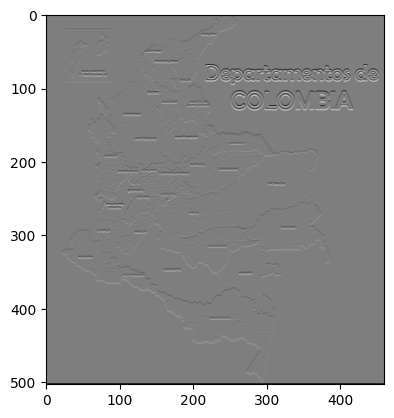

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import numpy as np

# Reshape img_tmp to have the required dimensions (batch_size, height, width, channels)
img_tmp_reshaped = img_tmp.reshape(1, img_tmp.shape[0], img_tmp.shape[1], 1) # Add batch size and channels

# Now create the Input layer with the correct shape
input_tensor = Input(shape=img_tmp_reshaped.shape[1:])

# Apply Conv2D layer to the input tensor
x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_tensor)

# Create the model
modelo3 = Model(inputs=input_tensor, outputs=x)

filtro1 = [[-1, -1], [1, 1]]
filtro2 = [[1, 1], [-1, -1]]

# Define the 'reformar_filtros' function
def reformar_filtros(filtro1, filtro2):

    # Convert filters to NumPy arrays
    filtro1 = np.array(filtro1)
    filtro2 = np.array(filtro2)

    # Reshape filters to match the input shape (height, width, channels, filters)
    filtro1 = filtro1.reshape(filtro1.shape[0], filtro1.shape[1], 1, 1)
    filtro2 = filtro2.reshape(filtro2.shape[0], filtro2.shape[1], 1, 1)

    # Stack the filters along the last axis to create a single filter tensor
    filtros = np.concatenate([filtro1, filtro2], axis=-1)

    return filtros

filtros = reformar_filtros(filtro1, filtro2)

modelo3.set_weights([filtros, np.array([0, 0], dtype=np.float32)])

img_tmp4 = modelo3.predict(img_tmp_reshaped)

plt.imshow(img_tmp4[0, :, :, 0], cmap='gray')
plt.show()


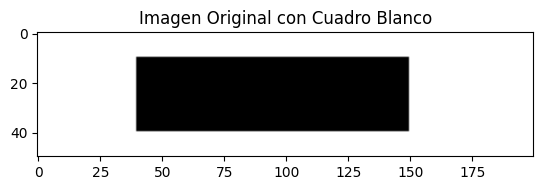

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


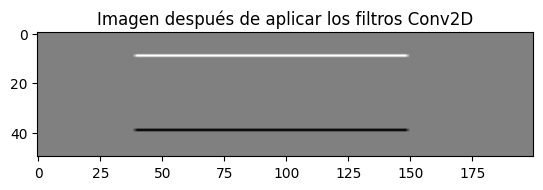

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Crear el arreglo mi_arreglo y definir una subregión
alto = 50
ancho = 200
mi_arreglo = np.zeros((alto, ancho))  # Fondo negro

mi_arreglo[10:40, 40:150] = 1

# Mostrar la imagen original
plt.imshow(-mi_arreglo, cmap='gray')
plt.title("Imagen Original")
plt.show()

mi_arreglo_reshaped = mi_arreglo.reshape(1, alto, ancho, 1)  # Forma (1, 50, 200, 1)

# Crear la capa Conv2D
input_tensor = Input(shape=mi_arreglo_reshaped.shape[1:])  # Input(shape=(50, 200, 1))

# Definir los filtros manualmente
filtro1 = np.array([[-1, -1], [1, 1]])  # Filtro 1
filtro2 = np.array([[1, 1], [-1, -1]])  # Filtro 2

# Reformar los filtros
def reformar_filtros(filtro1, filtro2):
    filtro1 = filtro1.reshape(filtro1.shape[0], filtro1.shape[1], 1, 1)  # (2, 2, 1, 1)
    filtro2 = filtro2.reshape(filtro2.shape[0], filtro2.shape[1], 1, 1)  # (2, 2, 1, 1)
    filtros = np.concatenate([filtro1, filtro2], axis=-1)  # Concatenar en el eje de filtros
    return filtros

filtros = reformar_filtros(filtro1, filtro2)

# Crear el modelo con la capa Conv2D
x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_tensor)
modelo = Model(inputs=input_tensor, outputs=x)

# Establecer los pesos (filtros y sesgos)
modelo.set_weights([filtros, np.array([0, 0], dtype=np.float32)])

# Aplicar el modelo a la imagen reshaped
img_tmp4 = modelo.predict(mi_arreglo_reshaped)

# Mostrar la imagen resultante después de aplicar el filtro
plt.imshow(img_tmp4[0, :, :, 0], cmap='gray')
plt.title("Imagen después de aplicar los filtros Conv2D")
plt.show()


VERTICAL

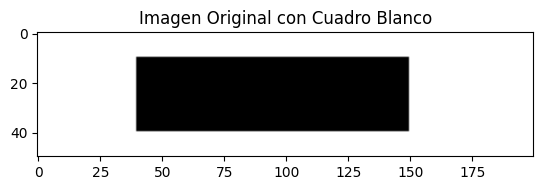

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


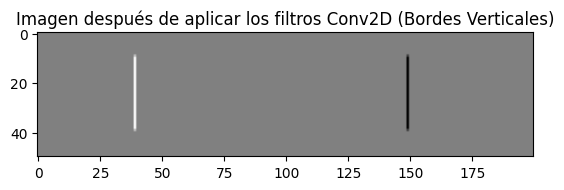

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

alto = 50
ancho = 200
mi_arreglo = np.zeros((alto, ancho))  # Fondo negro

# Definir una subregión con valor 1 (blanco) en el arreglo
mi_arreglo[10:40, 40:150] = 1

# Mostrar la imagen original
plt.imshow(-mi_arreglo, cmap='gray')
plt.title("Imagen Original")
plt.show()

mi_arreglo_reshaped = mi_arreglo.reshape(1, alto, ancho, 1)  # Forma (1, 50, 200, 1)

# Crear la capa Conv2D
input_tensor = Input(shape=mi_arreglo_reshaped.shape[1:])  # Input(shape=(50, 200, 1))

# Definir los filtros para bordes verticales
filtro1 = np.array([[-1, 1], [-1, 1]])  # Filtro para bordes verticales
filtro2 = np.array([[1, -1], [1, -1]])  # Filtro para bordes verticales opuestos

# Reformar los filtros
def reformar_filtros(filtro1, filtro2):
    filtro1 = filtro1.reshape(filtro1.shape[0], filtro1.shape[1], 1, 1)  # (2, 2, 1, 1)
    filtro2 = filtro2.reshape(filtro2.shape[0], filtro2.shape[1], 1, 1)  # (2, 2, 1, 1)
    filtros = np.concatenate([filtro1, filtro2], axis=-1)  # Concatenar en el eje de filtros
    return filtros

filtros = reformar_filtros(filtro1, filtro2)

# Crear el modelo con la capa Conv2D
x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_tensor)
modelo = Model(inputs=input_tensor, outputs=x)

# Establecer los pesos (filtros y sesgos)
modelo.set_weights([filtros, np.array([0, 0], dtype=np.float32)])

# Aplicar el modelo a la imagen reshaped
img_tmp4 = modelo.predict(mi_arreglo_reshaped)

# Mostrar la imagen resultante después de aplicar el filtro
plt.imshow(img_tmp4[0, :, :, 0], cmap='gray')
plt.title("Imagen después de aplicar los filtros Conv2D")
plt.show()


# FILTRO 3X3

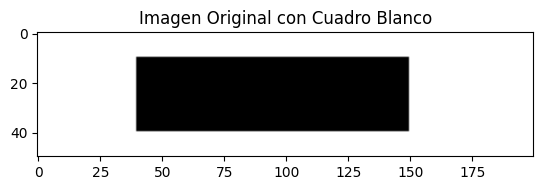

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


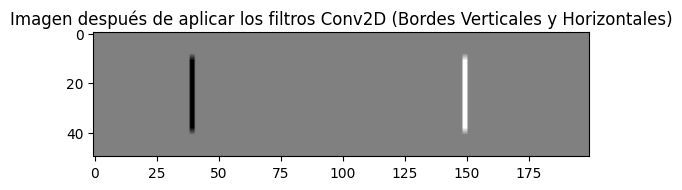

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Crear el arreglo mi_arreglo y definir una subregión
alto = 50
ancho = 200
mi_arreglo = np.zeros((alto, ancho))  # Fondo negro

# Definir una subregión con valor 1 (blanco) en el arreglo
mi_arreglo[10:40, 40:150] = 1

# Mostrar la imagen original
plt.imshow(-mi_arreglo, cmap='gray')
plt.title("Imagen Original con Cuadro Blanco")
plt.show()

mi_arreglo_reshaped = mi_arreglo.reshape(1, alto, ancho, 1)

# Crear la capa Conv2D
input_tensor = Input(shape=mi_arreglo_reshaped.shape[1:])

# Definir los filtros 3x3
filtro1 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Filtro 1 (Bordes verticales)
filtro2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Filtro 2 (Bordes horizontales)
filtro3 = np.array([[1, 2, 1], [2, -12, 2], [1, 2, 1]])  # Filtro 3 (Laplaciano)

def reformar_filtros(filtro1, filtro2, filtro3):
    filtro1 = filtro1.reshape(filtro1.shape[0], filtro1.shape[1], 1, 1)  # (3, 3, 1, 1)
    filtro2 = filtro2.reshape(filtro2.shape[0], filtro2.shape[1], 1, 1)  # (3, 3, 1, 1)
    filtro3 = filtro3.reshape(filtro3.shape[0], filtro3.shape[1], 1, 1)  # (3, 3, 1, 1)

    # Concatenar los filtros a lo largo del último eje
    filtros = np.concatenate([filtro1, filtro2, filtro3], axis=-1)  # (3, 3, 1, 3)
    return filtros

# Reformar los filtros
filtros = reformar_filtros(filtro1, filtro2, filtro3)

# Crear el modelo con la capa Conv2D
x = Conv2D(3, (3, 3), activation='linear', padding='same')(input_tensor)
modelo = Model(inputs=input_tensor, outputs=x)

# Establecer los pesos (filtros y sesgos)
modelo.set_weights([filtros, np.array([0, 0, 0], dtype=np.float32)])

# Aplicar el modelo a la imagen reshaped
img_tmp4 = modelo.predict(mi_arreglo_reshaped)

# Mostrar la imagen resultante después de aplicar los filtros
plt.imshow(img_tmp4[0, :, :, 0], cmap='gray')
plt.title("Imagen después de aplicar los filtros")
plt.show()